In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/obesity.csv')
df = pd.DataFrame(dataset)

In [ ]:
df.head(5)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Exploratory Data Analysis

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Age                                     2111 non-null   category
 1   Gender                                  2111 non-null   object  
 2   Height                                  2111 non-null   float64 
 3   Weight                                  2111 non-null   float64 
 4   CALC                                    2111 non-null   object  
 5   FAVC                                    2111 non-null   object  
 6   FCVC                                    2111 non-null   float64 
 7   NCP                                     2111 non-null   float64 
 8   SCC                                     2111 non-null   object  
 9   SMOKE                                   2111 non-null   object  
 10  CH2O                                    2111 non

In [156]:
df.shape

(2111, 26)

In [157]:
df.describe()

,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Age_encoded,Gender_lab_encoded,CALC_ord_encoded,FAVC_encoded,SCC_encoded,SMOKE_encoded,CAEC_ord_encoded,MTRANS_encoded,family_history_with_overweight_encoded
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,0.953103,0.505921,0.731407,0.883941,0.020843,0.020843,1.140692,2.365230,0.817622
std,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,0.735800,0.500083,0.515498,0.320371,0.142893,0.142893,0.468543,1.261423,0.386247
min,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000
50%,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000
75%,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000
max,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,5.000000,1.000000,3.000000,1.000000,1.000000,1.000000,3.000000,4.000000,1.000000


In [158]:
df.isna().sum()                  # not found missing values

Age                                       0
Gender                                    0
Height                                    0
Weight                                    0
CALC                                      0
FAVC                                      0
FCVC                                      0
NCP                                       0
SCC                                       0
SMOKE                                     0
CH2O                                      0
family_history_with_overweight            0
FAF                                       0
TUE                                       0
CAEC                                      0
MTRANS                                    0
NObeyesdad                                0
Age_encoded                               0
Gender_lab_encoded                        0
CALC_ord_encoded                          0
FAVC_encoded                              0
SCC_encoded                               0
SMOKE_encoded                   

In [159]:
df2 = df.copy()

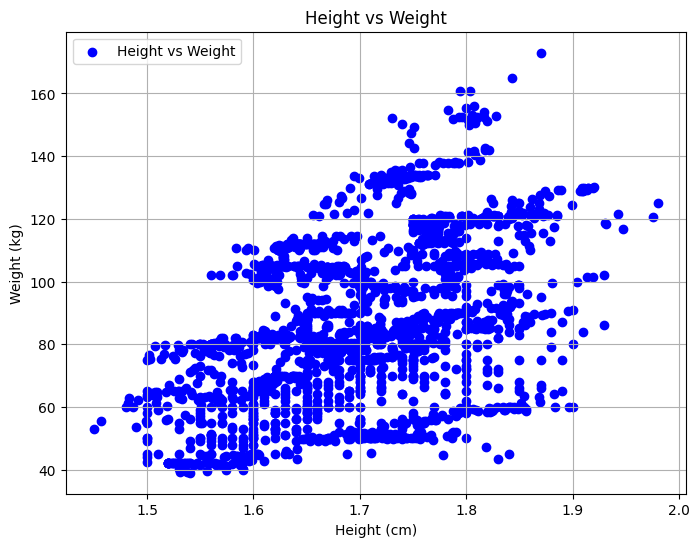

In [161]:
df2[['Height', 'Weight']].dtypes



plt.figure(figsize=(8, 6))
plt.scatter(df2['Height'], df2['Weight'], color='blue', label='Height vs Weight')
# Adding labels and title
plt.title('Height vs Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

# Adding a legend
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()

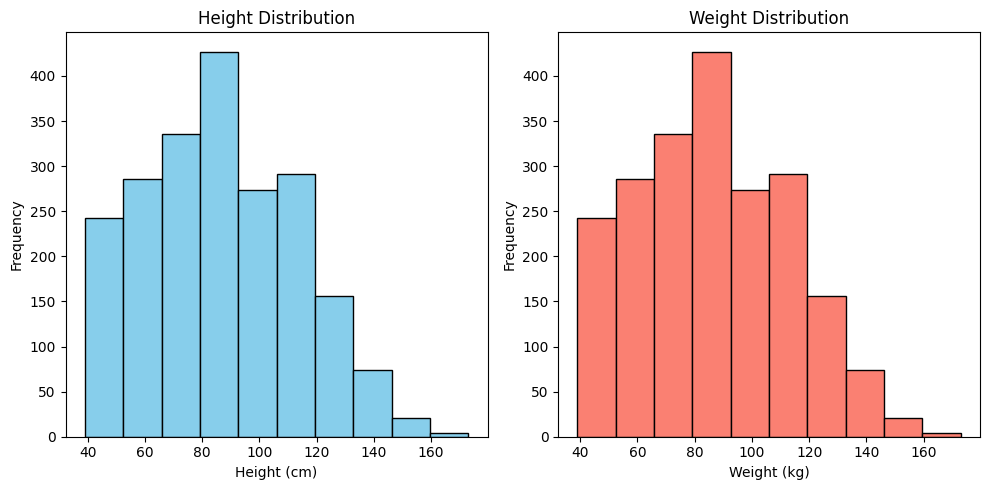

In [162]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.hist(df2['Weight'], bins=10, color='skyblue', edgecolor='black')
plt.title('Height Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.hist(df2['Weight'], bins=10, color='salmon', edgecolor='black')
plt.title('Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [166]:
df2[['Age', 'family_history_with_overweight']]

,Age,family_history_with_overweight
0,21-30,yes
1,21-30,yes
2,21-30,yes
3,21-30,no
4,21-30,no
...,...,...
2106,21-30,yes
2107,21-30,yes
2108,21-30,yes
2109,21-30,yes


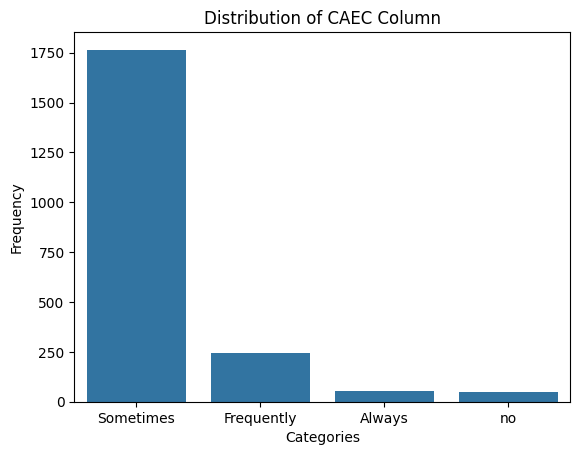

In [169]:
# Distribution of CAEC Values
sns.countplot(df2, x='CAEC')
plt.title('Distribution of CAEC Column')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

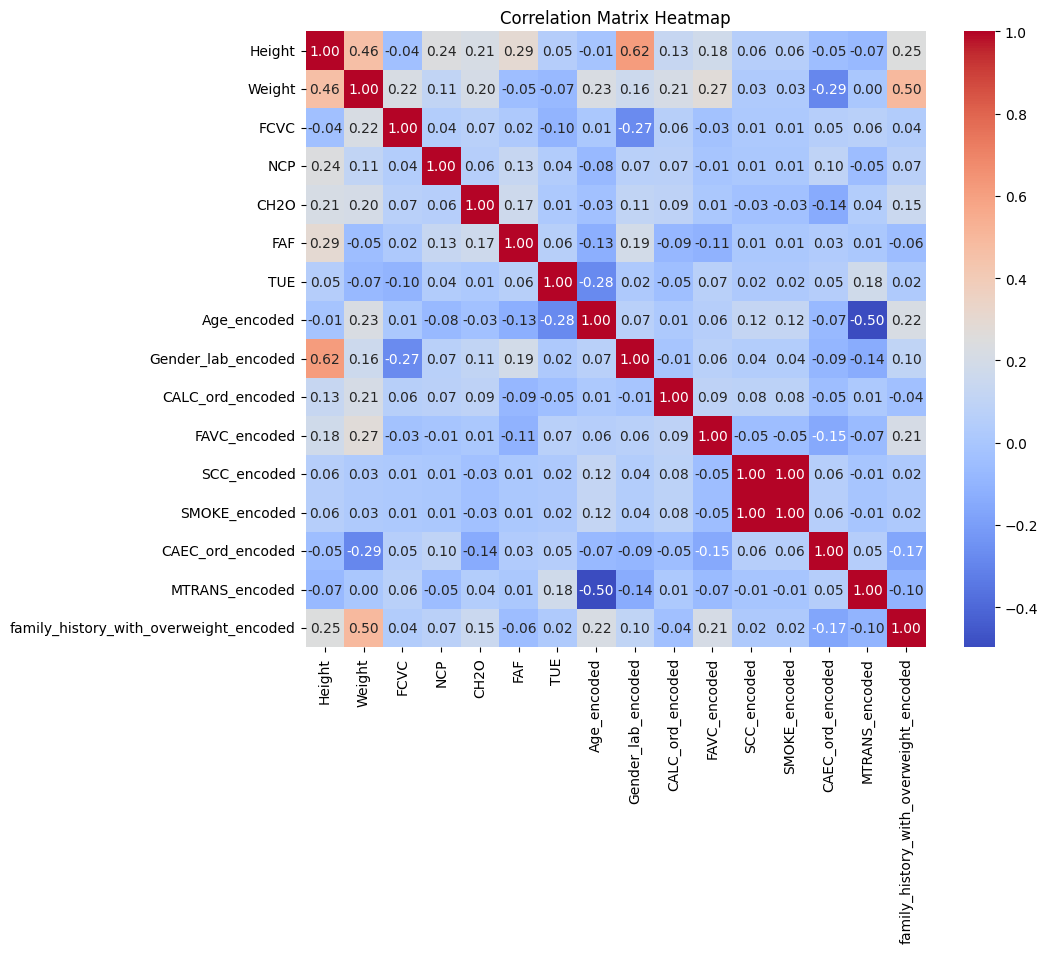

In [170]:
numeric_df = df2.select_dtypes(include='number')

# correlation matrix
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Categoric DATA encoding

# Econdings

In [ ]:
bins = [0, 20, 30, 40, 50, 60, float('inf')]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# label encoding
label_encoder = LabelEncoder()
df['Age_encoded'] = label_encoder.fit_transform(df['Age'])



In [ ]:
lab_enc = LabelEncoder()
df['Gender_lab_encoded'] = lab_enc.fit_transform(df['Gender'])

In [ ]:
label_enc = {'no': 0, 'Sometimes':1 , 'Frequently':2, 'Always':3}
df['CALC_ord_encoded'] =df['CALC'].map(label_enc)

In [ ]:
df['FAVC_encoded'] = lab_enc.fit_transform(df.iloc[:,5])


In [ ]:
df['SCC_encoded'] = lab_enc.fit_transform(df.iloc[:, 9])

In [ ]:
df['SMOKE_encoded'] =lab_enc.fit_transform(df['SMOKE'])

In [ ]:
label_enc = {'no': 0, 'Sometimes':1 , 'Frequently':2, 'Always':3}
df['CAEC_ord_encoded'] =df['CAEC'].map(label_enc)

In [ ]:
df['MTRANS'] = df['MTRANS'].astype('category')
df['MTRANS_encoded'] = lab_enc.fit_transform(df["MTRANS"])


In [ ]:
df['family_history_with_overweight_encoded'] = lab_enc.fit_transform(df['family_history_with_overweight'])

In [ ]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

# Splitting Data

In [ ]:
df_encoded  = df.copy()

In [ ]:
df_encoded.head(5)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,...,NObeyesdad,Age_encoded,Gender_lab_encoded,CALC_ord_encoded,FAVC_encoded,SCC_encoded,SMOKE_encoded,CAEC_ord_encoded,MTRANS_encoded,family_history_with_overweight_encoded
0,21-30,Female,1.62,64.0,no,no,2.0,3.0,no,no,...,Normal_Weight,1,0,0,0,0,0,1,3,1
1,21-30,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,...,Normal_Weight,1,0,1,0,1,1,1,3,1
2,21-30,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,...,Normal_Weight,1,1,2,0,0,0,1,3,1
3,21-30,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,...,Overweight_Level_I,1,1,2,0,0,0,1,4,0
4,21-30,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,...,Overweight_Level_II,1,1,1,0,0,0,1,3,0


In [ ]:
df3 = df_encoded.copy()

In [ ]:
df4 = df3[['Age_encoded', 'Gender_lab_encoded', 'CALC_ord_encoded', 'FAVC_encoded', 'SCC_encoded', 'SMOKE_encoded', 'CAEC_ord_encoded', 'MTRANS_encoded', 'family_history_with_overweight_encoded', 'NObeyesdad']]

In [ ]:
X = df4.drop(columns = ['NObeyesdad'])

In [ ]:
y = df4['NObeyesdad']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size as needed


# SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid to search
param_grid = {
    'C': [0.2, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

# Initialize the SVM classifier
svm_classifier = SVC()

# Initialize GridSearchCV with the defined parameter grid and classifier
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Make predictions on the test data using the best model
best_svm_classifier = grid_search.best_estimator_
y_pred_best = best_svm_classifier.predict(X_test)

# Evaluate the performance of the best model
print("Best SVM Classifier Performance:")
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


Best Hyperparameters:
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best SVM Classifier Performance:
                     precision    recall  f1-score   support

Insufficient_Weight       0.77      0.77      0.77        56
      Normal_Weight       0.59      0.63      0.61        62
     Obesity_Type_I       0.64      0.53      0.58        78
    Obesity_Type_II       0.51      0.81      0.63        58
   Obesity_Type_III       0.82      1.00      0.90        63
 Overweight_Level_I       0.54      0.36      0.43        56
Overweight_Level_II       0.77      0.48      0.59        50

           accuracy                           0.65       423
          macro avg       0.66      0.65      0.64       423
       weighted avg       0.66      0.65      0.64       423

Confusion Matrix:
[[43  4  2  2  0  5  0]
 [ 7 39  3  2  1  5  5]
 [ 0  8 41 18  7  4  0]
 [ 0  2  7 47  0  0  2]
 [ 0  0  0  0 63  0  0]
 [ 6  9  7 10  4 20  0]
 [ 0  4  4 13  2  3 24]]


# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# the parameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [3, 6, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}


tree_classifier = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=tree_classifier, param_grid=param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)

print("Best Hyperparameters:")
print(grid_search.best_params_)

# Make predictions on the test data using the best model
best_tree_classifier = grid_search.best_estimator_
y_pred_best = best_tree_classifier.predict(X_test)

# Evaluate the performance of the best model
print("Best Decision Tree Classifier Performance:")
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Best Hyperparameters:
{'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 6}
Best Decision Tree Classifier Performance:
                     precision    recall  f1-score   support

Insufficient_Weight       0.63      0.86      0.73        56
      Normal_Weight       0.66      0.56      0.61        62
     Obesity_Type_I       0.66      0.55      0.60        78
    Obesity_Type_II       0.52      0.84      0.64        58
   Obesity_Type_III       0.79      1.00      0.88        63
 Overweight_Level_I       0.73      0.29      0.41        56
Overweight_Level_II       0.75      0.48      0.59        50

           accuracy                           0.66       423
          macro avg       0.68      0.65      0.64       423
       weighted avg       0.68      0.66      0.64       423

Confusion Matrix:
[[48  3  2  2  0  0  1]
 [11 35  3  3  3  2  5]
 [ 2  4 43 18  7  3  1]
 [ 0  1  7 49  0  0  1]
 [ 0  0  0  0 63  0  0]
 [13  6  6 10  5 16  0]
 [ 2  4  4 1

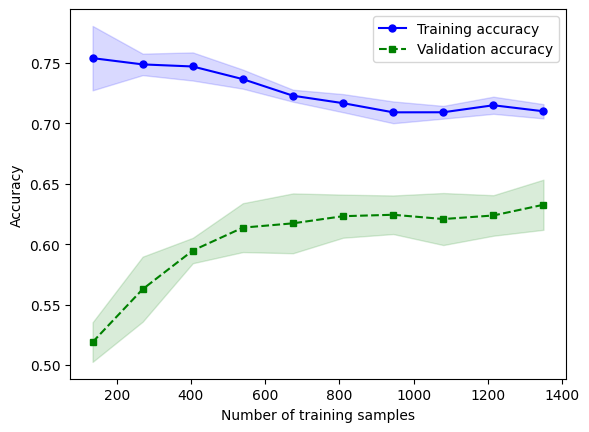

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(estimator=model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, valid_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, valid_mean + valid_std, valid_mean - valid_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation of CV Accuracy:", np.std(cv_scores))


Cross-Validation Scores: [0.62721893 0.6035503  0.64792899 0.60237389 0.64391691]
Mean CV Accuracy: 0.6249978052078029
Standard Deviation of CV Accuracy: 0.019290115797269067


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


knn_classifier = KNeighborsClassifier(n_neighbors=15)    #to improve accuracy n= 15

knn_classifier.fit(X_train, y_train)


y_pred_knn = knn_classifier.predict(X_test)


print("K-Nearest Neighbors (KNN) Classifier Performance:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Classifier Performance:
                     precision    recall  f1-score   support

Insufficient_Weight       0.57      0.89      0.69        56
      Normal_Weight       0.68      0.34      0.45        62
     Obesity_Type_I       0.64      0.59      0.61        78
    Obesity_Type_II       0.47      0.84      0.60        58
   Obesity_Type_III       0.77      1.00      0.87        63
 Overweight_Level_I       0.69      0.20      0.31        56
Overweight_Level_II       0.70      0.42      0.53        50

           accuracy                           0.62       423
          macro avg       0.64      0.61      0.58       423
       weighted avg       0.65      0.62      0.59       423

Confusion Matrix:
[[50  1  2  2  0  1  0]
 [19 21  4  6  3  3  6]
 [ 2  3 46 20  7  0  0]
 [ 1  0  7 49  0  0  1]
 [ 0  0  0  0 63  0  0]
 [13  5  8 12  5 11  2]
 [ 3  1  5 15  4  1 21]]
